<a href="https://colab.research.google.com/github/nupur1262/trying_face_detection/blob/master/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?id=1cw8_PkwVfT58CIYmkdmvueKVZtRVhZzl' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1cw8_PkwVfT58CIYmkdmvueKVZtRVhZzl" -O "export.pkl" && rm -rf /tmp/cookies.txt

--2020-08-26 11:54:22--  https://docs.google.com/uc?export=download&confirm=&id=1cw8_PkwVfT58CIYmkdmvueKVZtRVhZzl
Resolving docs.google.com (docs.google.com)... 108.177.126.139, 108.177.126.138, 108.177.126.113, ...
Connecting to docs.google.com (docs.google.com)|108.177.126.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-6k-docs.googleusercontent.com/docs/securesc/j4lvceffq3ecmeh98bns4sd47u0p4brq/ibof9u2vuqr3ms0rn133r2i42ka6mmik/1598442825000/00180827297015777168/04833758528909892613Z/1cw8_PkwVfT58CIYmkdmvueKVZtRVhZzl?e=download [following]
--2020-08-26 11:54:24--  https://doc-10-6k-docs.googleusercontent.com/docs/securesc/j4lvceffq3ecmeh98bns4sd47u0p4brq/ibof9u2vuqr3ms0rn133r2i42ka6mmik/1598442825000/00180827297015777168/04833758528909892613Z/1cw8_PkwVfT58CIYmkdmvueKVZtRVhZzl?e=download
Resolving doc-10-6k-docs.googleusercontent.com (doc-10-6k-docs.googleusercontent.com)... 108.177.127.132, 2a00:1450:4013:c07::84
Connectin

In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore")

In [9]:
predictor = load_learner('/content/')

In [113]:
url = input("Enter URL\n")
!wget -O "sample.jpg" {url}

Enter URL
https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTyQB2gsuEhCEym7BqTSsXOK9zcd38S95jgMA&usqp=CAU.jpg
--2020-08-26 16:09:04--  https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTyQB2gsuEhCEym7BqTSsXOK9zcd38S95jgMA
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 108.177.127.139, 108.177.127.101, 108.177.127.100, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|108.177.127.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4992 (4.9K) [image/jpeg]
Saving to: ‘sample.jpg’

sample.jpg          100%[===================>]   4.88K  --.-KB/s    in 0s      

2020-08-26 16:09:04 (66.4 MB/s) - ‘sample.jpg’ saved [4992/4992]



In [124]:
import cv2 

image = cv2.imread("/content/sample.jpg", 1) 


pic = cv2.resize(image, (244,244))
img = cv2.imwrite('output.jpg' , pic)


In [115]:
!wget -O "haarcascade_frontalface_default.xml" "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"

--2020-08-26 16:09:22--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.07s   

2020-08-26 16:09:23 (13.2 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [116]:
import dlib
import os
from imutils import face_utils
from PIL import Image
face_detector = dlib.get_frontal_face_detector()   
def face_finder(image_link):
  img=cv2.imread(image_link)
  frame = img
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  rects = face_detector(gray,0)
  data=[]
  for rect in rects:
    (x1,y1,x2,y2) = face_utils.rect_to_bb(rect) 
    data.append([x1,y1,x2,y2])
  return face_cropper(image_link,data)
def face_cropper(image_link,rects):
  cropped_images=[]
  for rect in rects:
    my_image=Image.open(image_link)
    x1=rect[0]
    y1=rect[1]
    x2=rect[2]
    y2=rect[3]
    cropped_images.append(my_image.crop((x1,y1,x1+x2,y1+y2)))
  return cropped_images

In [117]:
img = face_finder("/content/output.jpg")


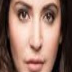

In [118]:
img[0]

not_me


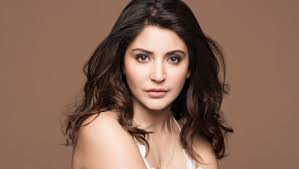

In [127]:
print(my_predictor('/content/output.jpg'))
img = open_image("/content/sample.jpg")
img